<a href="https://colab.research.google.com/github/viswakimi/day/blob/main/datasscience%20syllabus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Generate a classification dataset
X, y = make_classification(n_samples=1000, n_features=5,  n_informative=3, n_redundant=2, n_classes=2,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Logistic Regression Model
class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(5, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))

model = LogisticRegressionModel()

# Loss and Optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 2000
for epoch in range(num_epochs):
    model.train()
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    predictions = (y_pred > 0.5).float()
    accuracy = (predictions == y_test).sum() / y_test.size(0)
    print(f'Accuracy: {accuracy.item() * 100:.2f}%')


Epoch 10, Loss: 0.6092138290405273
Epoch 20, Loss: 0.5779356956481934
Epoch 30, Loss: 0.5504143238067627
Epoch 40, Loss: 0.5261377096176147
Epoch 50, Loss: 0.5046563148498535
Epoch 60, Loss: 0.48558178544044495
Epoch 70, Loss: 0.4685813784599304
Epoch 80, Loss: 0.45337188243865967
Epoch 90, Loss: 0.4397127628326416
Epoch 100, Loss: 0.42740002274513245
Epoch 110, Loss: 0.4162604808807373
Epoch 120, Loss: 0.40614697337150574
Epoch 130, Loss: 0.39693382382392883
Epoch 140, Loss: 0.38851383328437805
Epoch 150, Loss: 0.38079506158828735
Epoch 160, Loss: 0.37369826436042786
Epoch 170, Loss: 0.3671552538871765
Epoch 180, Loss: 0.36110684275627136
Epoch 190, Loss: 0.35550156235694885
Epoch 200, Loss: 0.35029467940330505
Epoch 210, Loss: 0.3454468846321106
Epoch 220, Loss: 0.34092381596565247
Epoch 230, Loss: 0.3366951644420624
Epoch 240, Loss: 0.332734078168869
Epoch 250, Loss: 0.32901686429977417
Epoch 260, Loss: 0.3255225419998169
Epoch 270, Loss: 0.3222322463989258
Epoch 280, Loss: 0.319129

Handwritten Digit Classification (Logistic Regression)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Load MNIST Dataset
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Define Logistic Regression Model
class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(28 * 28, 10)  # 28x28 input flattened to 784, 10 classes

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the image
        return self.linear(x)

# Initialize Model, Loss, Optimizer
model = LogisticRegressionModel()
criterion = nn.CrossEntropyLoss()  # Includes Softmax
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop
num_epochs = 5
for epoch in range(num_epochs):
    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the Model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on the test set: {accuracy:.2f}%')


Epoch [1/5], Loss: 0.1617
Epoch [2/5], Loss: 0.7211
Epoch [3/5], Loss: 0.6163
Epoch [4/5], Loss: 0.1540
Epoch [5/5], Loss: 0.1747
Accuracy on the test set: 92.48%


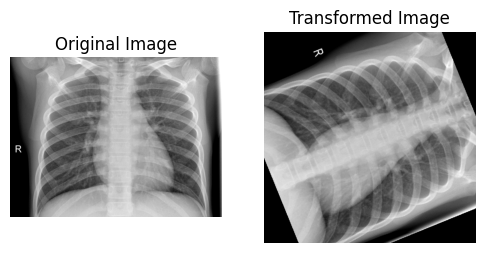

In [ ]:
from torchvision import transforms
from PIL import Image #python image lib
import matplotlib.pyplot as plt

# Define the transformations
transform = transforms.Compose([
    transforms.Resize((512, 512)),  # Resize to 224x224
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.RandomRotation(180),  # Random rotation between -30 and 30 degrees
    transforms.Grayscale(num_output_channels=1),  # Ensure grayscale
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.485], std=[0.229])  # Normalize (using dummy values)
])

# Load a chest X-ray image
image = Image.open("/content/IM-0071-0001.jpeg")

# Apply transformations
transformed_image = transform(image)

# Show original and transformed image
plt.figure(figsize=(6, 3))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Transformed Image (tensor)
plt.subplot(1, 2, 2)
plt.imshow(transformed_image.squeeze(0), cmap='gray')  # Convert tensor back to image
plt.title("Transformed Image")
plt.axis('off')

plt.show()


In [ ]:
criterion = nn.CrossEntropyLoss()
criterion = nn.MSELoss()
criterion = nn.BCELossLoss()

In [ ]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)


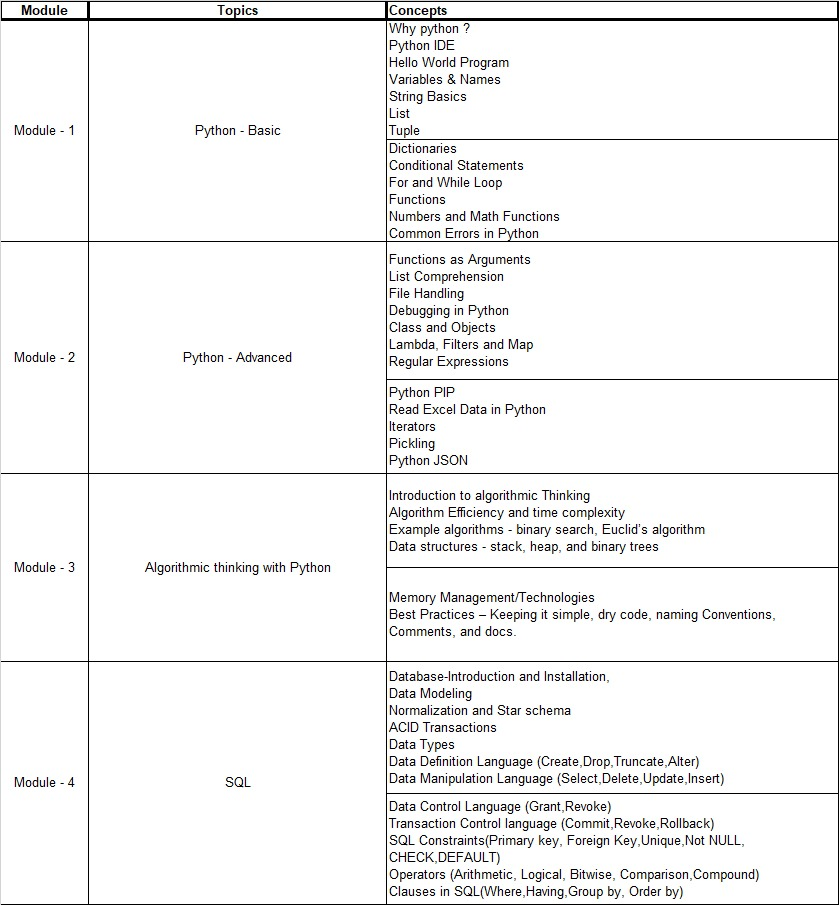

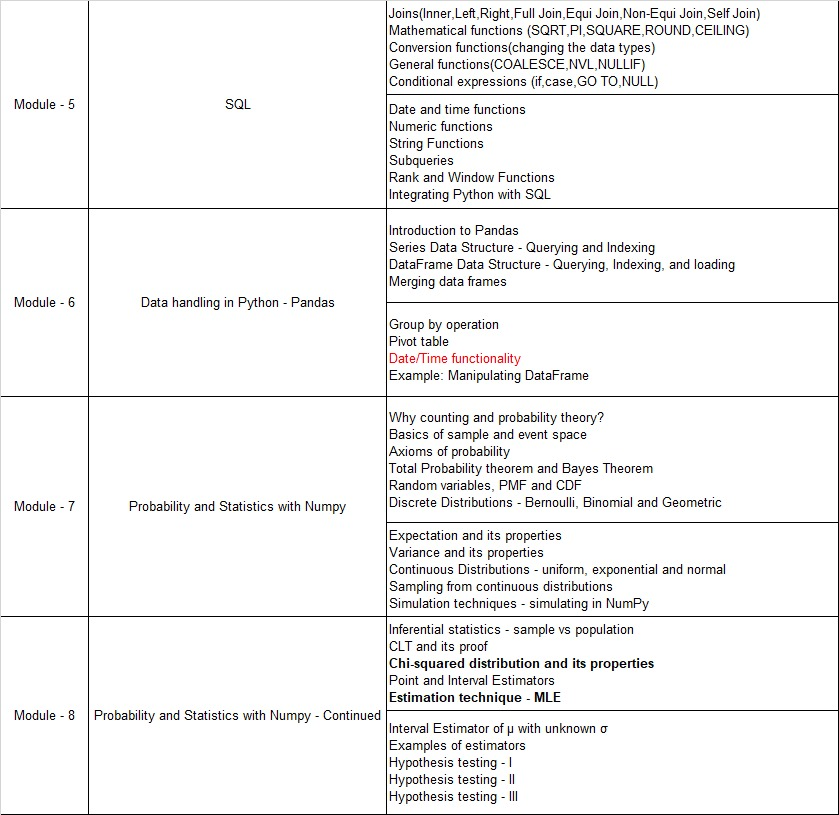

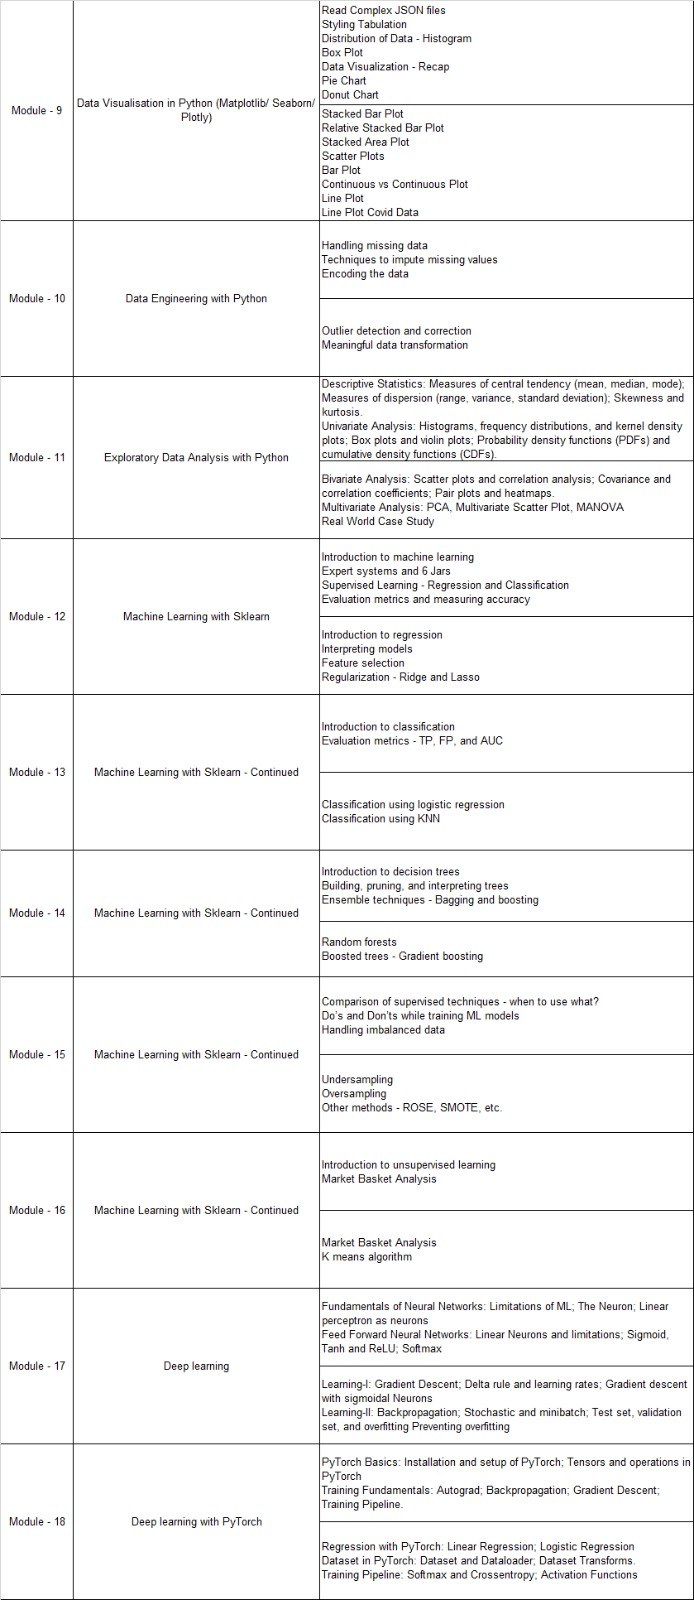

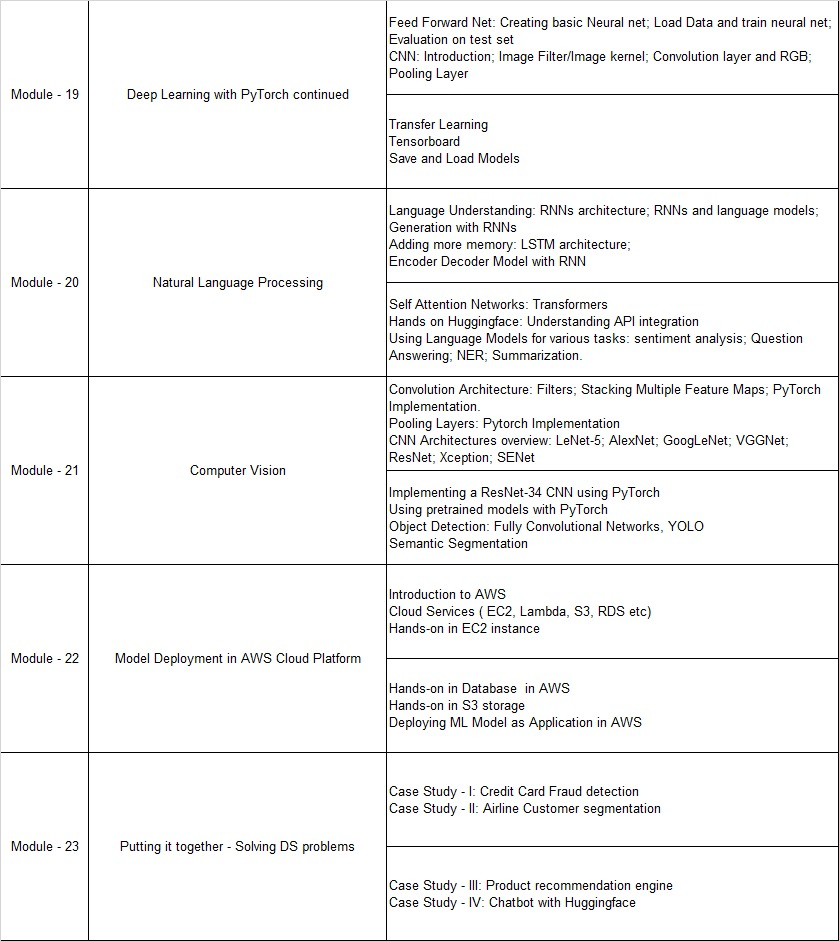

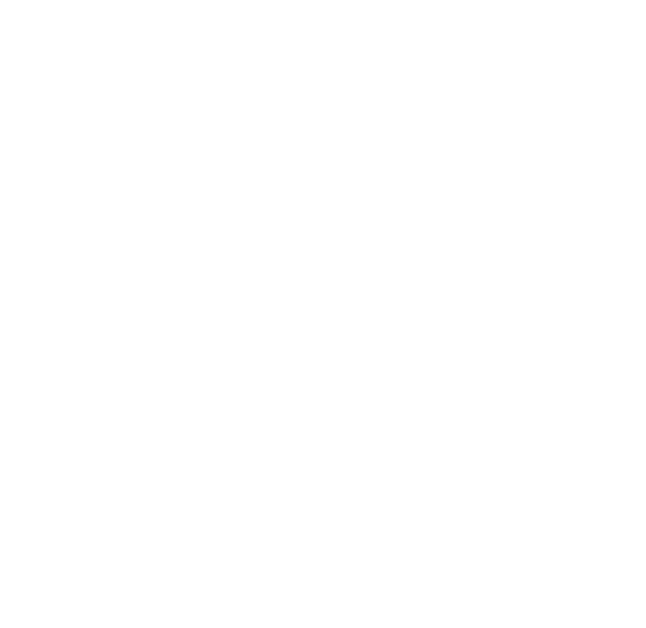